# 개요

Dacon의 대회 https://dacon.io/competitions/official/235626/data 에 대한 풀이.

중앙대학교 정영석, 김민환, 김학개, 진소연의 결과를 가져다 정리함.

# 데이터

## 다운로드

In [17]:
!wget https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/data/hiden_mnist_in_letter.csv

--2021-09-16 01:58:06--  https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/data/hiden_mnist_in_letter.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/hiden_mnist_in_letter.csv [following]
--2021-09-16 01:58:08--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/hiden_mnist_in_letter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4004157 (3.8M) [text/plain]
Saving to: ‘hiden_mnist_in_letter.csv’

hiden_mnist_in_lett 100%[===================>]   3.82M  --.-KB/s    in 0.04s   

2021-09-16

## 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hiden_mnist_in_letter.csv')
df.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


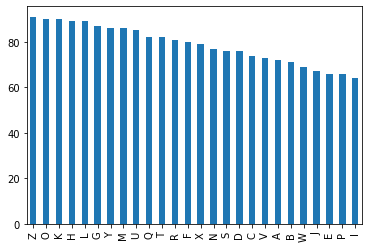

In [3]:
df['letter'].value_counts().plot(kind='bar')

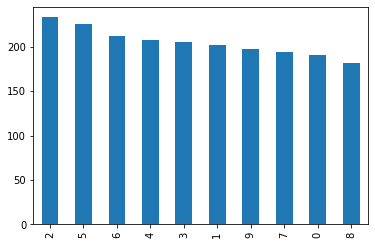

In [4]:
df['digit'].value_counts().plot(kind='bar')

In [5]:
df.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [6]:
raw_x = df.iloc[:,3:].to_numpy()
digit = df.digit.to_numpy() 
letter = df.letter.to_numpy()

In [7]:
print(digit)
print(letter)

[5 0 4 ... 9 0 5]
['L' 'B' 'L' ... 'A' 'Z' 'Z']


## normalization

In [8]:
x = raw_x / 255.0
y = digit

In [9]:
print(x.shape)
print(y.shape)

(2048, 784)
(2048,)


## 3d이미지로 reshape

In [10]:
x = x.reshape((-1,28,28,1))
print(x.shape)

(2048, 28, 28, 1)


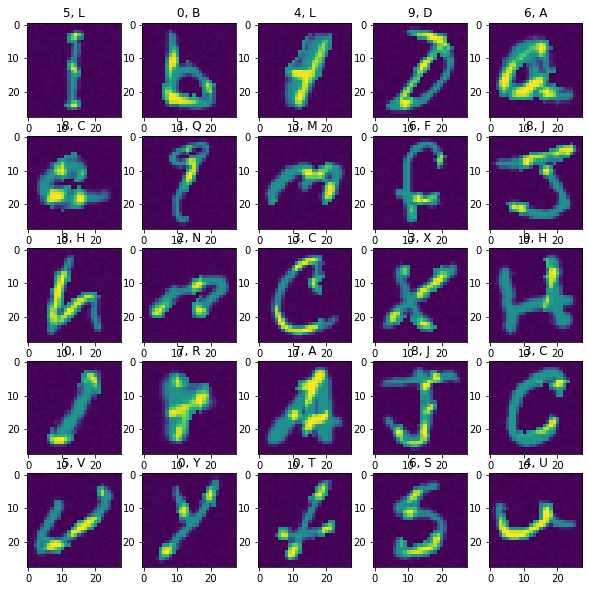

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.title('%s, %s' % (digit[i], letter[i]))
    plt.imshow(x[i].squeeze())

## 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

# 학습

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array 

import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.experimental import CosineDecay
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop, RandomRotation, RandomZoom, RandomWidth, RandomHeight
from tensorflow.keras.optimizers import Adam

## 모델 정의

In [14]:
model = keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2

## 학습 실행

In [15]:
history = model.fit(train_x,train_y, verbose=1, batch_size=128, epochs=200, validation_split=0.1)

Epoch 1/200
12/12 [==============================] - 5s 90ms/step - loss: 3.4691 - accuracy: 0.1004 - val_loss: 2.3192 - val_accuracy: 0.0976
Epoch 2/200
12/12 [==============================] - 0s 26ms/step - loss: 3.2058 - accuracy: 0.1187 - val_loss: 2.3581 - val_accuracy: 0.0671
Epoch 3/200
12/12 [==============================] - 0s 27ms/step - loss: 2.9340 - accuracy: 0.1533 - val_loss: 2.4351 - val_accuracy: 0.0610
Epoch 4/200
12/12 [==============================] - 0s 27ms/step - loss: 2.8120 - accuracy: 0.1547 - val_loss: 2.4794 - val_accuracy: 0.0610
Epoch 5/200
12/12 [==============================] - 0s 29ms/step - loss: 2.6120 - accuracy: 0.1859 - val_loss: 2.5195 - val_accuracy: 0.0610
Epoch 6/200
12/12 [==============================] - 0s 27ms/step - loss: 2.5495 - accuracy: 0.2035 - val_loss: 2.5989 - val_accuracy: 0.0610
Epoch 7/200
12/12 [==============================] - 0s 27ms/step - loss: 2.3760 - accuracy: 0.2266 - val_loss: 2.7129 - val_accuracy: 0.0610
Epoch 

## 로스 그래프

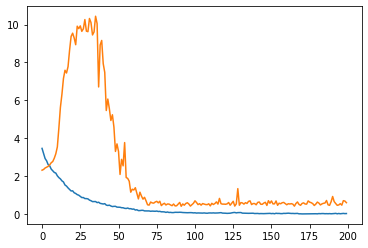

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 성능 보기

In [17]:
loss, acc = model.evaluate(test_x, test_y)
print(loss, acc)

13/13 [==============================] - 0s 13ms/step - loss: 0.6614 - accuracy: 0.8659
0.6613637804985046 0.8658536672592163
